<a href="https://washington.org"><img src = "https://stories.forbestravelguide.com/wp-content/uploads/2018/03/HERO-GuideToDCCherryBlossoms-CherryBlossomsAlongTheTidalBasin-CreditWashington.org_.jpg" width = 400> </a>

## Neighoborhood Battles: Prime locations for a New Restaurant Chain in Washington DC
##### by Meng Chen

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="##item1">Getting Data of the Demographic Information of the Washington DC</a>

2. <a href="##item2">Getting the Data of Washington DC Neighborhoods</a>

3. <a href="##item3">Data Analyses</a>
    
4. <a href="##item4">Results</a>
    
</font>
</div>

In [178]:
# impor the libraries for scaping the data from website
from bs4 import BeautifulSoup
import requests
import csv
import re

# import the libraries for the scientific computing
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

## 1. Getting Data of the Demographic Information of the Washington DC
The information includes basic demographic information, such as the population size and density, the number of households, and households income, of the neighoborhoods in Washington DC.
The demographic information of this project was scraped form DC HomeTownLocator website, where it acquired information from multiple sources, including Census Data.

### 1.1 Explore the website to see detailed features embeed in the web pages

In [269]:
# Exploration the web page of zipcode 20001
# demographic informaiton of the Washington DC area
html = requests.get('https://dc.hometownlocator.com/zip-codes/data,zipcode,20001.cfm').text
soup = BeautifulSoup(html, 'html.parser')
    
# typical data we need to scape
data_column = soup.find_all('span', class_ = 'indent')
features = list()
for line in data_column:
    feature_text =line.text
    individual_feature = feature_text.split('class="indent">')
    features.append(individual_feature)

# GPS coordinates
data_centroid = soup.find_all('li')
latitude = []
longtitude = []

centroid_text = data_centroid[4]
c =  str(centroid_text).split(',')
latitude = c[6]
longtitude = c[8].split('.c')[0]
    
required_features = features[:19]
required_features

[['Total Population'],
 ['Population in Households'],
 ['Population in Familes'],
 ['Population in Group Qrtrs'],
 ['Population Density1'],
 ['Diversity Index2'],
 ['Total Households'],
 ['Average Household Size'],
 ['Family Households'],
 ['Average Family Size'],
 ['Total Housing Units'],
 ['Owner Occupied HU'],
 ['Renter Occupied HU'],
 ['Vacant Housing Units'],
 ['Median Home Value'],
 ['Average Home Value'],
 ['Median Household Income'],
 ['Average Household Income'],
 ['Per Capita Income']]

In [263]:
latitude

'38.906639'

In [270]:
longtitude

'-77.016577'

In [249]:
# As our features are in a list of lists, I need to release it from the list
# Define a fucntion to convert the required_headers from a list of lists to a list of strings
def convert(l):
    m = []
    for x in l:
        for y in x:
            m.append(y)
    return m

features_ = convert(required_features)
features_

['Total Population',
 'Population in Households',
 'Population in Familes',
 'Population in Group Qrtrs',
 'Population Density1',
 'Diversity Index2',
 'Total Households',
 'Average Household Size',
 'Family Households',
 'Average Family Size',
 'Total Housing Units',
 'Owner Occupied HU',
 'Renter Occupied HU',
 'Vacant Housing Units',
 'Median Home Value',
 'Average Home Value',
 'Median Household Income',
 'Average Household Income',
 'Per Capita Income']

### 1.2 Scape the information from DC HomeTownLocator website

In [140]:
# Let's soup the main web page first
html = requests.get('https://dc.hometownlocator.com/zip-codes/countyzips,scfips,11001,c,district%20of%20columbia.cfm').text
soup = BeautifulSoup(html, 'html.parser')

# Find the links refers to the each zipcode
url_all = list()
tags = soup('a')
for tag in tags:
    url_temp = tag.get('href', None)
    url_all.append(url_temp)
    
# Remove those zipcodes having no demographic info
standard_zipcode = url_all[12:43]

In [476]:
# Put all useful links in a list
zipcode_html_list = list()
for url in standard_zipcode:
    zipcode_html_temp = 'https://dc.hometownlocator.com/zip-codes/'+url
    zipcode_html_list.append(zipcode_html_temp)
zipcode_html_list[:5]

['https://dc.hometownlocator.com/zip-codes/data,zipcode,20001.cfm',
 'https://dc.hometownlocator.com/zip-codes/data,zipcode,20002.cfm',
 'https://dc.hometownlocator.com/zip-codes/data,zipcode,20003.cfm',
 'https://dc.hometownlocator.com/zip-codes/data,zipcode,20004.cfm',
 'https://dc.hometownlocator.com/zip-codes/data,zipcode,20005.cfm']

### 1.3 Build a loop to scape the data of the required features

In [284]:
demographic_data_all = list()
latitude = list()
longtitude = list()

for html in zipcode_html_list:
    demographic_page = requests.get(html).text
    soup = BeautifulSoup(demographic_page, 'html.parser')
    # find all features
    demographic_data_inputs = soup.find_all('td', align = "right")
    demographic_data_input = list()
    for line in demographic_data_inputs:
        data_text = line.text
        individual_input = data_text.split('td align="right">')
        demographic_data_input.append(individual_input)
    demographic_data_all.append(demographic_data_input)
    ## find the GPS cooordinates
    data_centroid = soup.find_all('li')
    centroid_text = data_centroid[4]
    la_lon =  str(centroid_text).split(',')
    la_temp = la_lon[6]
    latitude.append(la_temp)
    lon_temp = la_lon[8].split('.c')[0]
    longtitude.append(lon_temp)

In [275]:
demographic_data_all[0]

[['50,832'],
 ['46,027'],
 ['21,319'],
 ['4,805'],
 ['23,835'],
 ['72'],
 ['22,865'],
 ['2.01'],
 ['7,730'],
 ['3'],
 ['25,288 (100%)'],
 ['7,620 (30.1%)'],
 ['15,245 (60.3%)'],
 ['2,423 ( 9.6%)'],
 ['$641,119'],
 ['$691,060'],
 ['$79,961'],
 ['$117,894'],
 ['$54,387']]

In [280]:
# Convert the a list of lists to a list of strings
demographic_data_all_ = convert(demographic_data_all)
_demographic_data_all_=convert(demographic_data_all_)

# Convert the data to array
# NOTE the 'None' data has been automatically removed, the resulting array size is 24 X 19
ar_demographic= np.array(_demographic_data_all_).reshape(24, len(features_))

# Convert to dataframe
df_demographic = pd.DataFrame(ar_demographic, index=np.arange(1, 25), columns=np.arange(1, len(features_)+1))

# Put the headers to the pd
df_demographic.columns = features_
df_demographic.head(5)

,Total Population,Population in Households,Population in Familes,Population in Group Qrtrs,Population Density1,Diversity Index2,Total Households,Average Household Size,Family Households,Average Family Size,Total Housing Units,Owner Occupied HU,Renter Occupied HU,Vacant Housing Units,Median Home Value,Average Home Value,Median Household Income,Average Household Income,Per Capita Income
1,"50,832","46,027","21,319","4,805","23,835",72,"22,865",2.01,"7,730",3,"25,288 (100%)","7,620 (30.1%)","15,245 (60.3%)","2,423 ( 9.6%)","$641,119","$691,060","$79,961","$117,894","$54,387"
2,"70,497","68,331","39,594","2,166","13,198",63,"31,059",2.2,"13,800",3,"34,503 (100%)","11,409 (33.1%)","19,650 (57.0%)","3,444 ( 10.0%)","$604,298","$656,558","$76,877","$116,731","$51,869"
3,"33,414","28,971","13,445","4,443","15,687",60,"15,528",1.87,"5,236",3,"17,105 (100%)","6,111 (35.7%)","9,417 (55.1%)","1,577 ( 9.2%)","$761,788","$828,289","$107,896","$143,924","$67,758"
4,"1,855","1,795",658,60,"3,145",56,"1,266",1.42,322,2,"1,627 (100%)",466 (28.6%),800 (49.2%),361 (22.2%),"$589,552","$653,755","$145,550","$192,161","$131,612"
5,"14,588","14,293","4,075",295,"33,005",72,"9,297",1.54,"1,678",2,"9,799 (100%)","2,293 (23.4%)","7,004 (71.5%)",502 ( 5.1%),"$696,400","$830,789","$95,287","$130,947","$83,743"


In [152]:
# get all zip codes
zipcode_all = list()
for line in zipcode_html_list:
    zipcode_temp = line.split(',')
    zipcode_temp = zipcode_temp[2]
    zipcode_temp = zipcode_temp.split('.')
    zipcode_temp = zipcode_temp[0]
    zipcode_all.append(zipcode_temp)

# drop the zip codes having 'None' data
k = (29, 28, 27, 26, 24, 23, 19)
for n in k:
    zipcode_all.remove(zipcode_all[n])

In [290]:
# add zip column to the dataframe
df_demographic['Zip Code'] = zipcode_all

In [285]:
# processig GPS coordinates data
k = (29, 28, 27, 26, 24, 23, 19)
for n in k:
    latitude.remove(latitude[n])
    longtitude.remove(longtitude[n])

In [286]:
# Add the GPS data to the dataframe
df_demographic['Latitude'] = latitude
df_demographic['Longtitude'] = longtitude

In [291]:
# check the data types of each feature
df_demographic.head(3)

,Total Population,Population in Households,Population in Familes,Population in Group Qrtrs,Population Density1,Diversity Index2,Total Households,Average Household Size,Family Households,Average Family Size,...,Renter Occupied HU,Vacant Housing Units,Median Home Value,Average Home Value,Median Household Income,Average Household Income,Per Capita Income,Latitude,Longtitude,Zip Code
1,"50,832","46,027","21,319","4,805","23,835",72,"22,865",2.01,"7,730",3,...,"15,245 (60.3%)","2,423 ( 9.6%)","$641,119","$691,060","$79,961","$117,894","$54,387",38.906639,-77.016577,20001
2,"70,497","68,331","39,594","2,166","13,198",63,"31,059",2.2,"13,800",3,...,"19,650 (57.0%)","3,444 ( 10.0%)","$604,298","$656,558","$76,877","$116,731","$51,869",38.905231,-76.992743,20002
3,"33,414","28,971","13,445","4,443","15,687",60,"15,528",1.87,"5,236",3,...,"9,417 (55.1%)","1,577 ( 9.2%)","$761,788","$828,289","$107,896","$143,924","$67,758",38.880908,-76.994494,20003


In [288]:
df_demographic.dtypes

Total Population             object
Population in Households     object
Population in Familes        object
Population in Group Qrtrs    object
Population Density1          object
Diversity Index2             object
Total Households             object
Average Household Size       object
Family Households            object
Average Family Size          object
Total Housing Units          object
Owner Occupied HU            object
Renter Occupied HU           object
Vacant Housing Units         object
Median Home Value            object
Average Home Value           object
Median Household Income      object
Average Household Income     object
Per Capita Income            object
Latitude                     object
Longtitude                   object
dtype: object

In [292]:
# Save the data
df_demographic.to_csv ('DC_demographic.csv', sep= ',', header=True)

### 1.4 Read the clean demographic data

In [296]:
df = pd.read_csv('DC_demographic_clean.csv', sep= ',')

In [297]:
# drop the zipcode with 0 inputs
df.drop([23], axis=0, inplace =True)
df.head(3)

,Zip Code,Total Population,Population in Households,Population in Familes,Population in Group Qrtrs,Population Density,Diversity Index,Total Households,Average Household Size,Family Households,...,Owner Occupied HU,Renter Occupied HU,Vacant Housing Units,Median Home Value,Average Home Value,Median Household Income,Average Household Income,Per Capita Income,Latitude,Longtitude
0,20001,50832,46027,21319,4805,23835,72,22865,2,7730,...,7620,15245,2423,641119,691060,79961,117894,54387,38.906639,-77.016577
1,20002,70497,68331,39594,2166,13198,63,31059,2,13800,...,11409,19650,3444,604298,656558,76877,116731,51869,38.905231,-76.992743
2,20003,33414,28971,13445,4443,15687,60,15528,2,5236,...,6111,9417,1577,761788,828289,107896,143924,67758,38.880908,-76.994494


In [298]:
df.describe()

,Zip Code,Total Population,Population in Households,Population in Familes,Population in Group Qrtrs,Population Density,Diversity Index,Total Households,Average Household Size,Family Households,...,Owner Occupied HU,Renter Occupied HU,Vacant Housing Units,Median Home Value,Average Home Value,Median Household Income,Average Household Income,Per Capita Income,Latitude,Longtitude
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000
mean,20029.826087,29891.565217,28168.739130,16089.826087,1722.826087,13254.304348,53.173913,13303.608696,1.956522,5578.304348,...,5311.782609,7991.826087,1123.565217,5.914683e+05,6.820846e+05,84866.391304,122045.956522,59844.130435,38.907941,-77.021911
std,75.734376,21048.352693,20731.733759,13958.587890,1857.757266,10276.767870,18.987202,9140.422492,0.562322,4488.723725,...,3611.900821,6033.168033,955.772359,2.770601e+05,3.064660e+05,41544.087148,53493.769731,30992.601637,0.036272,0.034929
min,20001.000000,58.000000,58.000000,16.000000,0.000000,494.000000,16.000000,23.000000,1.000000,4.000000,...,0.000000,23.000000,3.000000,0.000000e+00,0.000000e+00,16900.000000,37560.000000,14895.000000,38.828906,-77.088596
25%,20006.500000,14899.500000,14372.000000,5410.000000,359.500000,6884.000000,40.500000,7397.000000,2.000000,2147.500000,...,3060.000000,3066.500000,423.500000,4.258035e+05,4.954340e+05,53549.500000,85817.500000,34784.500000,38.891445,-77.040817
50%,20012.000000,30530.000000,26952.000000,12645.000000,735.000000,9659.000000,56.000000,13252.000000,2.000000,4846.000000,...,4665.000000,6841.000000,803.000000,6.042980e+05,6.910600e+05,81670.000000,117894.000000,61354.000000,38.905726,-77.027748
75%,20019.500000,45267.500000,41827.500000,20326.000000,2581.500000,16445.000000,67.000000,19264.500000,2.000000,7734.000000,...,7184.000000,11850.500000,1726.000000,7.201280e+05,8.320725e+05,106430.500000,145503.500000,81770.000000,38.933087,-76.996198
max,20374.000000,70497.000000,68331.000000,43837.000000,5659.000000,42715.000000,85.000000,31059.000000,3.000000,13913.000000,...,13075.000000,20421.000000,3444.000000,1.150234e+06,1.263582e+06,183840.000000,246386.000000,131612.000000,38.973853,-76.938125


In [299]:
# explore some features (variables) among the dataset
df['% Occupied HU'] = 1- (df['Vacant Housing Units'] / df['Total Housing Units'])
df.head(5)

,Zip Code,Total Population,Population in Households,Population in Familes,Population in Group Qrtrs,Population Density,Diversity Index,Total Households,Average Household Size,Family Households,...,Renter Occupied HU,Vacant Housing Units,Median Home Value,Average Home Value,Median Household Income,Average Household Income,Per Capita Income,Latitude,Longtitude,% Occupied HU
0,20001,50832,46027,21319,4805,23835,72,22865,2,7730,...,15245,2423,641119,691060,79961,117894,54387,38.906639,-77.016577,0.904184
1,20002,70497,68331,39594,2166,13198,63,31059,2,13800,...,19650,3444,604298,656558,76877,116731,51869,38.905231,-76.992743,0.900183
2,20003,33414,28971,13445,4443,15687,60,15528,2,5236,...,9417,1577,761788,828289,107896,143924,67758,38.880908,-76.994494,0.907805
3,20004,1855,1795,658,60,3145,56,1266,1,322,...,800,361,589552,653755,145550,192161,131612,38.892163,-77.027748,0.778119
4,20005,14588,14293,4075,295,33005,72,9297,2,1678,...,7004,502,696400,830789,95287,130947,83743,38.905386,-77.030988,0.948770


#### 1.5 Explore the dataset for discrete features (variables) that not highly correlated with each

In [300]:
df_no_zipcode = df.drop(['Zip Code','Latitude','Longtitude'], axis=1)
df_no_zipcode.head(3)

,Total Population,Population in Households,Population in Familes,Population in Group Qrtrs,Population Density,Diversity Index,Total Households,Average Household Size,Family Households,Average Family Size,Total Housing Units,Owner Occupied HU,Renter Occupied HU,Vacant Housing Units,Median Home Value,Average Home Value,Median Household Income,Average Household Income,Per Capita Income,% Occupied HU
0,50832,46027,21319,4805,23835,72,22865,2,7730,3,25288,7620,15245,2423,641119,691060,79961,117894,54387,0.904184
1,70497,68331,39594,2166,13198,63,31059,2,13800,3,34503,11409,19650,3444,604298,656558,76877,116731,51869,0.900183
2,33414,28971,13445,4443,15687,60,15528,2,5236,3,17105,6111,9417,1577,761788,828289,107896,143924,67758,0.907805


In [301]:
df_no_zipcode.corr()

,Total Population,Population in Households,Population in Familes,Population in Group Qrtrs,Population Density,Diversity Index,Total Households,Average Household Size,Family Households,Average Family Size,Total Housing Units,Owner Occupied HU,Renter Occupied HU,Vacant Housing Units,Median Home Value,Average Home Value,Median Household Income,Average Household Income,Per Capita Income,% Occupied HU
Total Population,1.000000,0.996160,0.925875,0.213280,0.331248,-0.080571,0.972565,0.409372,0.956356,0.317813,0.977628,0.918218,0.923751,0.898605,0.076840,0.052356,-0.149921,-0.148807,-0.282071,0.017514
Population in Households,0.996160,1.000000,0.938572,0.126927,0.326386,-0.071530,0.970405,0.427953,0.965268,0.321524,0.974820,0.913597,0.923244,0.889973,0.043911,0.021051,-0.162020,-0.165832,-0.284982,0.020475
Population in Familes,0.925875,0.938572,1.000000,0.016099,0.069782,-0.228018,0.833471,0.483388,0.994325,0.370183,0.846751,0.817614,0.773249,0.863375,-0.123564,-0.142185,-0.276343,-0.284924,-0.422722,-0.054495
Population in Group Qrtrs,0.213280,0.126927,0.016099,1.000000,0.110721,-0.114619,0.189868,-0.137591,0.063539,0.012749,0.197954,0.208062,0.163095,0.249477,0.380560,0.358275,0.109475,0.164628,-0.015582,-0.030065
Population Density,0.331248,0.326386,0.069782,0.110721,1.000000,0.400714,0.463263,-0.084121,0.117040,-0.160926,0.444528,0.280474,0.533945,0.207409,0.253720,0.275067,0.082347,0.059907,0.141413,0.259786
Diversity Index,-0.080571,-0.071530,-0.228018,-0.114619,0.400714,1.000000,-0.015474,0.145488,-0.209839,0.124075,-0.030823,0.025461,-0.038686,-0.173594,0.028045,-0.030882,0.062286,0.041885,0.083046,0.089888
Total Households,0.972565,0.970405,0.833471,0.189868,0.463263,-0.015474,1.000000,0.346973,0.881711,0.246059,0.998779,0.911636,0.969256,0.856908,0.152087,0.134332,-0.066881,-0.068024,-0.157560,0.061697
Average Household Size,0.409372,0.427953,0.483388,-0.137591,-0.084121,0.145488,0.346973,1.000000,0.471892,0.745698,0.343655,0.391978,0.291007,0.267133,-0.221674,-0.281823,-0.300636,-0.314484,-0.477919,0.077504
Family Households,0.956356,0.965268,0.994325,0.063539,0.117040,-0.209839,0.881711,0.471892,1.000000,0.365485,0.892762,0.861073,0.820315,0.882079,-0.055282,-0.076485,-0.223624,-0.229218,-0.372957,-0.032525
Average Family Size,0.317813,0.321524,0.370183,0.012749,-0.160926,0.124075,0.246059,0.745698,0.365485,1.000000,0.247608,0.326900,0.177079,0.230144,-0.250066,-0.332249,-0.269909,-0.277705,-0.516740,0.009769


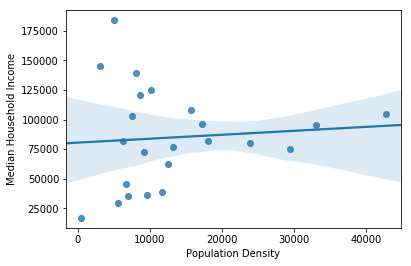

In [302]:
## An example of data exploration
sns.regplot(x="Population Density", y="Median Household Income", data=df)

In [315]:
df_useful = df[['Zip Code', 'Population Density', '% Occupied HU', 'Per Capita Income', 'Latitude', 'Longtitude']]
df_useful.head(5)

,Zip Code,Population Density,% Occupied HU,Per Capita Income,Latitude,Longtitude
0,20001,23835,0.904184,54387,38.906639,-77.016577
1,20002,13198,0.900183,51869,38.905231,-76.992743
2,20003,15687,0.907805,67758,38.880908,-76.994494
3,20004,3145,0.778119,131612,38.892163,-77.027748
4,20005,33005,0.948770,83743,38.905386,-77.030988


In [319]:
df_useful.to_csv ('zipcode_useful_data.csv', sep= ',', header=True)

## 2. Getting the Data of Washington DC Neighborhoods

### 2.1 Gathering the crime data

In [469]:
# Reading the data
df_crime = pd.read_csv('dc-crimes-search-results.csv', sep=',')
df_crime.head(2)

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,YEAR,offensekey,BID,sector,PSA,ucr-rank,BLOCK_GROUP,VOTING_PRECINCT,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,OCTO_RECORD_ID,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 27,7200.0,property,-77.006673,NaN,theft/other,midnight,134605,1.0,6,2017,property|theft/other,capitol riverfront,1D3,106.0,6,007200 1,precinct 131,399421,70 - 101 block of i street se,2017-08-09T23:41:06.000,17137263,theft/other,17137263-01,6D,2017-08-10T05:12:43.000Z,others,"38.879285614771092,-77.006675169592285",38.879278
1,cluster 8,5800.0,property,-77.020924,2017-08-09T23:30:44.000,theft f/auto,midnight,136884,1.0,2,2017,property|theft f/auto,downtown,1D1,102.0,7,005800 2,precinct 129,398185,600 - 699 block of h street nw,2017-08-09T23:00:16.000,17137292,theft f/auto,17137292-01,2C,2017-08-10T07:34:18.000Z,others,"38.899814022192331,-77.020925903391088",38.899806


In [159]:
df_crime.shape

(66759, 29)

In [311]:
cluster_crime_data = df_crime['NEIGHBORHOOD_CLUSTER'].value_counts().to_frame()
cluster_crime = cluster_crime_data.reset_index()
cluster_crime.columns = ['Cluster', 'Count of Crimes']
cluster_crime.head(5)

,Cluster,Count of Crimes
0,cluster 2,5115
1,cluster 8,4693
2,cluster 25,3827
3,cluster 6,3273
4,cluster 3,3201


### 2.2 Washington DC neighorhood data

In [161]:
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [162]:
with open('dc_data.geojson') as json_data:
    dc_data = json.load(json_data)

In [169]:
neighborhoods = dc_data['features']
neighborhoods[0]['properties']

{'OBJECTID': 1,
 'WEB_URL': 'http://planning.dc.gov/',
 'NAME': 'Cluster 39',
 'NBH_NAMES': 'Congress Heights, Bellevue, Washington Highlands',
 'Shape_Length': 10711.668009757177,
 'Shape_Area': 4886462.547938361,
 'TYPE': 'Original'}

In [170]:
cluster_data = list()
neighborhood_name = list()

for m in range(len(neighborhoods)):
    cluster_data_temp = neighborhoods[m]['properties']['NAME']
    cluster_data.append(cluster_data_temp)
    neighborhood_name_temp = neighborhoods[m]['properties']['NBH_NAMES']
    neighborhood_name.append(neighborhood_name_temp)

In [171]:
df_neighborhoods = pd.DataFrame(cluster_data, neighborhood_name)

In [172]:
neighborhood_data = df_neighborhoods.reset_index()
neighborhood_data.columns = ['Neighborhood', 'Cluster']

In [173]:
neighborhood_data.Cluster = neighborhood_data.Cluster.apply(lambda x: x.lower())

In [174]:
neighborhood_data.head(5)

,Neighborhood,Cluster
0,"Congress Heights, Bellevue, Washington Highlands",cluster 39
1,"Douglas, Shipley Terrace",cluster 38
2,"Woodland/Fort Stanton, Garfield Heights, Knox ...",cluster 36
3,"Near Southeast, Navy Yard",cluster 27
4,"River Terrace, Benning, Greenway, Dupont Park",cluster 32


In [313]:
Neighborhood_info = pd.merge(neighborhood_data, cluster_crime, on='Cluster')
Neighborhood_info.head()

,Neighborhood,Cluster,Count of Crimes
0,"Congress Heights, Bellevue, Washington Highlands",cluster 39,2390
1,"Douglas, Shipley Terrace",cluster 38,1076
2,"Woodland/Fort Stanton, Garfield Heights, Knox ...",cluster 36,538
3,"Near Southeast, Navy Yard",cluster 27,600
4,"River Terrace, Benning, Greenway, Dupont Park",cluster 32,1629


In [317]:
Neighborhood_info.to_csv ('neigh_crime_data.csv', sep= ',', header=True)

### 2.3 Find the zip codes corresponding to DC neighorboods

In [309]:
# Reading the neigborhood and zip code data
neigh_zip = pd.read_csv('neigh_zip.csv', sep = ',')
neigh_zip.head()

,Neighborhood,Zip code
0,Cardozo,20001
1,Howard University,20001
2,Le Droit Park,20001
3,Logan Circle,20001
4,Mount Vernon Square,20001


In [304]:
neigh_group = neigh_zip.groupby(['Zip code'], as_index = False).agg({'Neighborhood': lambda x: ', '.join(x)})

In [306]:
neigh_group.head(5)

,Zip code,Neighborhood
0,20001,"Cardozo , Howard University , Le Droit Park , ..."
1,20002,"Arboretum , Carver Langston , Eckington , Ivy ..."
2,20003,"Navy Yard , Near Southeast"
3,20007,"Burleith , Foxhall Crescent , Foxhall Village ..."
4,20008,"Cleveland Park , Forest Hills , North Clevelan..."


In [316]:
neigh_group.head()

,Zip code,Neighborhood
0,20001,"Cardozo , Howard University , Le Droit Park , ..."
1,20002,"Arboretum , Carver Langston , Eckington , Ivy ..."
2,20003,"Navy Yard , Near Southeast"
3,20007,"Burleith , Foxhall Crescent , Foxhall Village ..."
4,20008,"Cleveland Park , Forest Hills , North Clevelan..."


In [320]:
neigh_group.to_csv ('neigh_group_data.csv', sep= ',', header=True)

## 3. Data Analyses

### 3.1 Neighorhood classification based on the demographic information of the neighborhoods

In [356]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

In [357]:
df_for_analysis = pd.read_csv ('zipcode_useful_data.csv', sep =',')

In [358]:
df_for_analysis.head(3)

,Zip Code,Population Density,% Occupied HU,Per Capita Income,Latitude,Longitude
0,20001,23835,0.904184,54387,38.906639,-77.016577
1,20002,13198,0.900183,51869,38.905231,-76.992743
2,20003,15687,0.907805,67758,38.880908,-76.994494


In [359]:
# standarized the data to an array
X = df_for_analysis.values[:,1:]
X = np.nan_to_num(X)
y = df_for_analysis['Zip Code']
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset[0]

array([ 1.05271365, -0.41072024, -0.1800358 , -0.03669527,  0.15614015])

In [360]:
## find the best k
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X,y)
    yhat=neigh.predict(X)
    mean_acc[n-1] = metrics.accuracy_score(y, yhat)
    
    std_acc[n-1]=np.std(yhat==y)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 0.43478261, 0.34782609, 0.30434783, 0.17391304,
       0.13043478, 0.13043478, 0.08695652, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826])

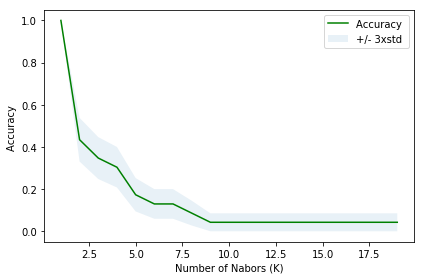

In [361]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [362]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1


### 3.2 Segmenting and Clustering Neighborhoods in Washington DC using Foursquare API
I could not get the GPS coordinates of the neighborhoods, so istead of I have GPS coordinates of each avaliable Zip Codes

In [363]:
import numpy as np 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

print('Libraries imported.')

Libraries imported.


#### 3.2.1 Locate the Washington DC in a map

In [364]:
address = 'Washington, DC'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Washington DC are {}, {}.'.format(latitude, longitude))

/anaconda3/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  DeprecationWarning,


The geograpical coordinate of Washington DC are 38.8950092, -77.0365625.


In [470]:
# create map of New York using latitude and longitude values
map_wdc = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, zipcode in zip(df_for_analysis['Latitude'], df_for_analysis['Longitude'], df_for_analysis['Zip Code']):
    label = '{}'.format(zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wdc)  
    
map_wdc

#### 3.2.2 Define the Foursquare API credential and version

In [413]:
CLIENT_ID = 'QBJKCK54JEFMRBEM2PYPPCZJAOPWKDTXJPLBUAOPJTW00USE' # your Foursquare ID
CLIENT_SECRET = 'BKF5XYC4KEG2R1WCRBFAEJJOVXLKO3SE0PVYQL2HVPFFHN54' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 20

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QBJKCK54JEFMRBEM2PYPPCZJAOPWKDTXJPLBUAOPJTW00USE
CLIENT_SECRET:BKF5XYC4KEG2R1WCRBFAEJJOVXLKO3SE0PVYQL2HVPFFHN54


#### 3.3.3 Getting and preprocessing the data

In [414]:
# function for getting all venues around the neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [415]:
wdc_venues = getNearbyVenues(names=df_for_analysis['Zip Code'],
                                   latitudes=df_for_analysis['Latitude'],
                                   longitudes=df_for_analysis['Longitude']
                                  )

20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20015
20016
20017
20018
20019
20020
20024
20032
20036
20037
20374


In [482]:
# look the data table
print(wdc_venues.shape)
wdc_venues.head(10)

(447, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,20001,38.906639,-77.016577,sweetgreen,38.903307,-77.018647,Salad Place
1,20001,38.906639,-77.016577,A Baked Joint,38.902280,-77.017215,Café
2,20001,38.906639,-77.016577,Saint's Paradise Cafeteria,38.905810,-77.020216,Southern / Soul Food Restaurant
3,20001,38.906639,-77.016577,Vida Fitness,38.902555,-77.018066,Gym / Fitness Center
4,20001,38.906639,-77.016577,Shouk,38.902737,-77.020600,Vegetarian / Vegan Restaurant
5,20001,38.906639,-77.016577,Kinship,38.903305,-77.021797,New American Restaurant
6,20001,38.906639,-77.016577,The Capital Burger,38.903107,-77.021751,Burger Joint
7,20001,38.906639,-77.016577,RPM Italian,38.902220,-77.020940,Italian Restaurant
8,20001,38.906639,-77.016577,Morris,38.903482,-77.021937,Cocktail Bar
9,20001,38.906639,-77.016577,SoulCycle Mount Vernon,38.901930,-77.020469,Cycle Studio


In [471]:
# show the data of each neighborhood (zip codes)
wdc_venues.groupby('Neighborhood').count().head(3)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
20001,20,20,20,20,20,20
20002,20,20,20,20,20,20
20003,20,20,20,20,20,20


In [472]:
# one hot encoding
wdc_onehot = pd.get_dummies(wdc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
wdc_onehot['Neighborhood'] = wdc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [wdc_onehot.columns[-1]] + list(wdc_onehot.columns[:-1])
wdc_onehot = wdc_onehot[fixed_columns]

wdc_onehot.head(2)

,Neighborhood,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Caribbean Restaurant,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Quad,College Residence Hall,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Doctor's Office,Donut Shop,Drugstore,Eastern European Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,History Museum,Home Service,Hospital,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Juice Bar,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Other Repair Shop,Park,Persian Restaurant,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Recreation Center,Rental Car Location,Restaurant,River,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Steakhouse,Strip Club,Student Center,Taco Place,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,20001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [419]:
# check the shape of the data
wdc_onehot.shape

(447, 145)

In [420]:
wdc_grouped = wdc_onehot.groupby('Neighborhood').mean().reset_index()
wdc_grouped.head()

,Neighborhood,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Caribbean Restaurant,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Quad,College Residence Hall,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Doctor's Office,Donut Shop,Drugstore,Eastern European Restaurant,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,History Museum,Home Service,Hospital,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Juice Bar,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Other Repair Shop,Park,Persian Restaurant,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Recreation Center,Rental Car Location,Restaurant,River,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Steakhouse,Strip Club,Student Center,Taco Place,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,20001,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.05,0.0,0.00,0.05,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.05,0.0,0.05,0.0,0.0,0.00,0.0,0.10,0.10,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.10,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.05,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.05,0.00,0.05,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.05,0.05,0.05,0.0,0.0
1,20002,0.00,0.0,0.05,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.05,0.0,0.0,0.05,0.0,0.05,0.00,0.0,0.05,0.00,0.1,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.1,0.0,0.05,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.05,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.0,0.05,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.05,0.00,0.00,0.0,0.0
2,20003,0.05,0.0,0.00,0.05,0.00,0.0,0.0,0.0,0.05,0.0,0.00,0.0,0.00,0.00,0.00,0.05,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.05,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.05,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.05,0.0,0.0,0.05,0.05,0.0,0.05,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.05,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.05,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.05,0.0,0.0,0.00,0.0,0.0,0.05,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.00,0.00,0.05,0.0,0.0
3,20004,0.05,0.0,0.0

In [421]:
wdc_grouped.shape

(23, 145)

In [422]:
# find the ten top venues of each neighborhood
num_top_venues = 10

for hood in wdc_grouped['Neighborhood']:
    temp = wdc_grouped[wdc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

                             venue  freq
0               Italian Restaurant  0.10
1                     Cocktail Bar  0.10
2                      Coffee Shop  0.10
3             Gym / Fitness Center  0.10
4                     Burger Joint  0.05
5                             Café  0.05
6  Southern / Soul Food Restaurant  0.05
7          New American Restaurant  0.05
8                   Sandwich Place  0.05
9                      Salad Place  0.05


                    venue  freq
0            Gourmet Shop  0.10
1          Ice Cream Shop  0.10
2                  Market  0.05
3            Cocktail Bar  0.05
4              Food Truck  0.05
5             Coffee Shop  0.05
6  Furniture / Home Store  0.05
7              Steakhouse  0.05
8               Gastropub  0.05
9              Beer Store  0.05


                         venue  freq
0          American Restaurant  0.05
1           Belgian Restaurant  0.05
2           Italian Restaurant  0.05
3         Gym / Fitness Center  0.05
4       

In [425]:
# define a function extract the top venue categories
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [478]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = wdc_grouped['Neighborhood']

for ind in np.arange(wdc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(wdc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,20001,Italian Restaurant,Cocktail Bar,Gym / Fitness Center,Coffee Shop,Sandwich Place,Southern / Soul Food Restaurant,Café,Bar,Salad Place,Cycle Studio
1,20002,Gourmet Shop,Ice Cream Shop,Pizza Place,Pub,Coffee Shop,Cocktail Bar,Market,Seafood Restaurant,Beer Store,Fish Market
2,20003,American Restaurant,Spa,Grocery Store,Gay Bar,Gym / Fitness Center,Italian Restaurant,Eastern European Restaurant,Donut Shop,New American Restaurant,Pizza Place
3,20004,History Museum,Science Museum,American Restaurant,Coffee Shop,Brazilian Restaurant,Bike Rental / Bike Share,Steakhouse,Sculpture Garden,Museum,Indie Movie Theater
4,20005,Hotel,New American Restaurant,American Restaurant,Beer Bar,Pizza Place,Coffee Shop,Mexican Restaurant,Salon / Barbershop,Eastern European Restaurant,Latin American Restaurant


#### 3.3.4 Cluster analyses

In [479]:
# set number of clusters
kclusters = 5

wdc_grouped_clustering = wdc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(wdc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape
df_for_analysis.shape

(23, 7)

In [480]:
wdc_merged = df_for_analysis

# add clustering labels
wdc_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
wdc_merged = wdc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Zip Code')

wdc_merged.head(3) # check the last columns!

,Zip Code,Population Density,% Occupied HU,Per Capita Income,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,20001,23835,0.904184,54387,38.906639,-77.016577,1,Italian Restaurant,Cocktail Bar,Gym / Fitness Center,Coffee Shop,Sandwich Place,Southern / Soul Food Restaurant,Café,Bar,Salad Place,Cycle Studio
1,20002,13198,0.900183,51869,38.905231,-76.992743,1,Gourmet Shop,Ice Cream Shop,Pizza Place,Pub,Coffee Shop,Cocktail Bar,Market,Seafood Restaurant,Beer Store,Fish Market
2,20003,15687,0.907805,67758,38.880908,-76.994494,1,American Restaurant,Spa,Grocery Store,Gay Bar,Gym / Fitness Center,Italian Restaurant,Eastern European Restaurant,Donut Shop,New American Restaurant,Pizza Place


In [483]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wdc_merged['Latitude'], wdc_merged['Longitude'], wdc_merged['Zip Code'], wdc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Results

In [464]:
wdc_merged.drop(['Latitude', 'Longitude'], axis=1, inplace = True)

wdc_merged.loc[wdc_merged['Cluster Labels'] == 0, wdc_merged.columns[[0] + list(range(1, wdc_merged.shape[1]))]]

,Zip Code,Population Density,% Occupied HU,Per Capita Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,20011,12524,0.927823,36049,0,Park,Chinese Restaurant,Caribbean Restaurant,Southern / Soul Food Restaurant,Persian Restaurant,Pharmacy,Plaza,Miscellaneous Shop,Burger Joint,Lounge
11,20012,7508,0.952954,61354,0,Sandwich Place,Liquor Store,Pizza Place,Convenience Store,Coffee Shop,Bus Station,Shoe Store,Café,Caribbean Restaurant,Discount Store
16,20019,9659,0.898685,21976,0,Convenience Store,American Restaurant,Food & Drink Shop,Diner,Sandwich Place,Burger Joint,Seafood Restaurant,Donut Shop,Soccer Field,Pharmacy
19,20032,7015,0.888935,20070,0,Liquor Store,Convenience Store,Grocery Store,Basketball Court,Gas Station,Food,Intersection,Costume Shop,Park,Pizza Place
22,20374,494,0.884615,14895,0,Convenience Store,Chinese Restaurant,Grocery Store,Intersection,River,Sandwich Place,Doctor's Office,Shoe Repair,Pizza Place,Hotel


In [465]:
wdc_merged.loc[wdc_merged['Cluster Labels'] == 1, wdc_merged.columns[[0] + list(range(1, wdc_merged.shape[1]))]]

,Zip Code,Population Density,% Occupied HU,Per Capita Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,20001,23835,0.904184,54387,1,Italian Restaurant,Cocktail Bar,Gym / Fitness Center,Coffee Shop,Sandwich Place,Southern / Soul Food Restaurant,Café,Bar,Salad Place,Cycle Studio
1,20002,13198,0.900183,51869,1,Gourmet Shop,Ice Cream Shop,Pizza Place,Pub,Coffee Shop,Cocktail Bar,Market,Seafood Restaurant,Beer Store,Fish Market
2,20003,15687,0.907805,67758,1,American Restaurant,Spa,Grocery Store,Gay Bar,Gym / Fitness Center,Italian Restaurant,Eastern European Restaurant,Donut Shop,New American Restaurant,Pizza Place
7,20008,8641,0.955510,98936,1,Thai Restaurant,Israeli Restaurant,Steakhouse,Movie Theater,Deli / Bodega,Mediterranean Restaurant,Chaat Place,Café,Salon / Barbershop,Sandwich Place
8,20009,42715,0.956264,79797,1,Grocery Store,Ice Cream Shop,Restaurant,Yoga Studio,Speakeasy,Bakery,Bar,Coffee Shop,Falafel Restaurant,Gym
9,20010,29512,0.940325,44057,1,Bar,Pizza Place,Yoga Studio,Shipping Store,Asian Restaurant,Bakery,Beer Garden,Caribbean Restaurant,Coffee Shop,Cuban Restaurant
12,20015,5083,0.948373,102928,1,American Restaurant,Liquor Store,Coffee Shop,Bistro,Grocery Store,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Pharmacy,Pizza Place
13,20016,8008,0.951494,85925,1,Coffee Shop,Food Truck,Italian Restaurant,American Restaurant,Student Center,Pizza Place,College Residence Hall,College Arts Building,Deli / Bodega,Burger Joint
14,20017,9221,0.943764,40119,1,American Restaurant,Coffee Shop,Sandwich Place,Breakfast Spot,Gastropub,Fast Food Restaurant,Latin American Restaurant,Ethiopian Restaurant,Mexican Restaurant,Dance Studio
15,20018,6753,0.943325,33520,1,Pizza Place,Concert Hall,Brewery,Ice Cream Shop,Liquor Store,Martial Arts Dojo,Massage Studio,Drugstore,Discount Store,Deli / Bodega


In [466]:
wdc_merged.loc[wdc_merged['Cluster Labels'] == 2, wdc_merged.columns[[0] + list(range(1, wdc_merged.shape[1]))]]

,Zip Code,Population Density,% Occupied HU,Per Capita Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,20004,3145,0.778119,131612,2,History Museum,Science Museum,American Restaurant,Coffee Shop,Brazilian Restaurant,Bike Rental / Bike Share,Steakhouse,Sculpture Garden,Museum,Indie Movie Theater


In [467]:
wdc_merged.loc[wdc_merged['Cluster Labels'] == 3, wdc_merged.columns[[0] + list(range(1, wdc_merged.shape[1]))]]

,Zip Code,Population Density,% Occupied HU,Per Capita Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,20007,10127,0.947865,76236,3,Deli / Bodega,French Restaurant,Park,Yoga Studio,Salad Place,Art Museum,Asian Restaurant,Bakery,Bar,Cosmetics Shop
17,20020,11661,0.893493,24308,3,Shoe Store,Park,Pizza Place,Bank,Sandwich Place,Shopping Mall,Deli / Bodega,Mobile Phone Shop,Fast Food Restaurant,Recreation Center


In [468]:
wdc_merged.loc[wdc_merged['Cluster Labels'] == 4, wdc_merged.columns[[0] + list(range(1, wdc_merged.shape[1]))]]

,Zip Code,Population Density,% Occupied HU,Per Capita Income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,20005,33005,0.948770,83743,4,Hotel,New American Restaurant,American Restaurant,Beer Bar,Pizza Place,Coffee Shop,Mexican Restaurant,Salon / Barbershop,Eastern European Restaurant,Latin American Restaurant
5,20006,5604,0.968843,24294,4,Coffee Shop,Sandwich Place,Government Building,Park,Hotel,American Restaurant,Indian Restaurant,Concert Hall,College Quad,Salad Place
18,20024,6221,0.912642,64390,4,Hotel,Theater,Music Venue,Pizza Place,Dessert Shop,Burger Joint,Mediterranean Restaurant,Café,Mexican Restaurant,Spanish Restaurant
20,20036,17203,0.964258,91302,4,Hotel,Mediterranean Restaurant,Museum,Yoga Studio,Spanish Restaurant,Burger Joint,Coffee Shop,Comedy Club,Hotel Bar,Lounge
21,20037,18030,0.870659,66890,4,Hotel,American Restaurant,Cycle Studio,New American Restaurant,Movie Theater,Salad Place,Café,Seafood Restaurant,Indian Restaurant,Hotel Bar
